# Biodiversity in National Parks Project

For this project, I will interpret data from the National Parks Service about endangered species in different parks.

I will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, I will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way

## Step 1: Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load in the csv files into dataframes and inspect.

In [3]:
species = pd.read_csv('species_info.csv')
species.head

<bound method NDFrame.head of             category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
...              ...                            ...   
5819  Vascular Plant               Solanum parishii   
5820  Vascular Plant                  Solanum xanti   
5821  Vascular Plant         Parthenocissus vitacea   
5822  Vascular Plant              Vitis californica   
5823  Vascular Plant            Tribulus terrestris   

                                           common_names conservation_status  
0                              Gapper's Red-Backed Vole                 NaN  
1                                 American Bison, Bison                 NaN  
2     Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN

In [4]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Step 3: Inspect the data

First I'll see how many species I'm dealing with.

In [5]:
species.scientific_name.nunique()

5541

Then I'll check to see each unique category.

In [6]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

There are 7 different categories
- 5 Fauna
- 2 Flora

I would like to create a column `biota` that puts these values into two categories `Fauna` & `Flora`.

In [7]:
conds = [ species['category'].isin(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish']),
          species['category'].isin(['Vascular Plant', 'Nonvascular Plant']) ]
values = [ 'Fauna', 'Flora' ]

species['biota'] = np.select(conds, values)

species.head()

,category,scientific_name,common_names,conservation_status,biota
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Fauna
1,Mammal,Bos bison,"American Bison, Bison",NaN,Fauna
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,Fauna
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,Fauna
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,Fauna


Now I'll check to see how many species of Fauna and Flora we have:

In [10]:
faunaVflora = species.groupby('biota').scientific_name.nunique().reset_index()
faunaVflora.rename(columns={
    'scientific_name':"count"
}, inplace=True)
faunaVflora

,biota,count
0,Fauna,946
1,Flora,4595


Then 'll inspect the `conservation_status` column:

In [16]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

## Step 4: What is the distribution of `conservation_status` for animals (fauna)

First I'll group species by `conservation_status` and `biota`

In [26]:
species.groupby(['conservation_status', 'biota']).scientific_name.nunique().reset_index()

,conservation_status,biota,scientific_name
0,Endangered,Fauna,14
1,Endangered,Flora,1
2,In Recovery,Fauna,4
3,No Intervention,Fauna,819
4,No Intervention,Flora,4544
5,Species of Concern,Fauna,103
6,Species of Concern,Flora,48
7,Threatened,Fauna,8
8,Threatened,Flora,2


As we saw before we have more than 125 species of Fauna, 946 to be precise, so I will fill the Null values with 
'No Intervention'.

In [24]:
species.conservation_status.fillna('No Intervention', inplace = True)

Now if we run the table again.

In [94]:
species_by_cs = species.groupby(['conservation_status', 'biota']).scientific_name.nunique().reset_index()
species_by_cs

,conservation_status,biota,scientific_name
0,Endangered,Fauna,14
1,Endangered,Flora,1
2,In Recovery,Fauna,4
3,No Intervention,Fauna,819
4,No Intervention,Flora,4544
5,Species of Concern,Fauna,103
6,Species of Concern,Flora,48
7,Threatened,Fauna,8
8,Threatened,Flora,2


Removing the Flora from the table

In [95]:
species_by_cs.drop(labels=[1, 4, 6, 8],
                   axis=0,
                   inplace = True)
species_by_cs

,conservation_status,biota,scientific_name
0,Endangered,Fauna,14
2,In Recovery,Fauna,4
3,No Intervention,Fauna,819
5,Species of Concern,Fauna,103
7,Threatened,Fauna,8


In [300]:
species_by_cs.rename(columns={
    'scientific_name':'count'
}, inplace=True)
species_by_cs

,conservation_status,biota,count
0,Endangered,Fauna,14
2,In Recovery,Fauna,4
5,Species of Concern,Fauna,103
7,Threatened,Fauna,8


In [96]:
species_by_cs.reset_index()

,index,conservation_status,biota,scientific_name
0,0,Endangered,Fauna,14
1,2,In Recovery,Fauna,4
2,3,No Intervention,Fauna,819
3,5,Species of Concern,Fauna,103
4,7,Threatened,Fauna,8


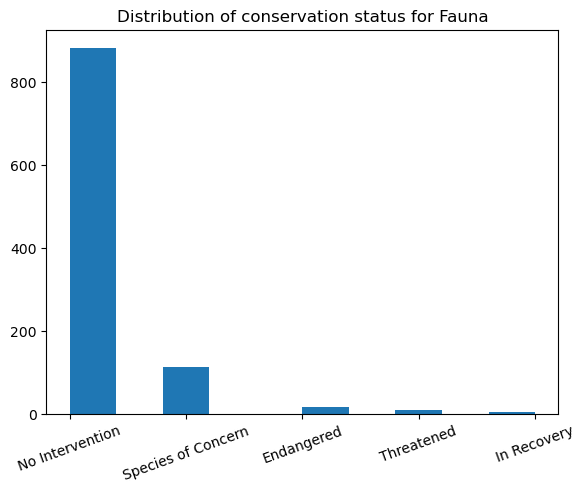

<Figure size 640x480 with 0 Axes>

In [229]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.hist(species.conservation_status[species.biota == 'Fauna'])
plt.xticks(rotation = 20)
plt.title('Distribution of conservation status for Fauna')
plt.show()
plt.savefig('Distribution of conservation status for Fauna.jpeg')

## Step 5: Are certain types of species more likely to be endangered?

I'll start by creating the column `is_endangered` that provides a boolean value True if the species is and else, False

In [147]:
species['is_endangered'] = species.conservation_status == 'Endangered'
species[species.is_endangered == True]

,category,scientific_name,common_names,conservation_status,animal,biota,is_endangered
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,Fauna,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True,Fauna,True
34,Mammal,Myotis grisescens,Gray Myotis,Endangered,True,Fauna,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,Fauna,True
72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered,True,Fauna,True
173,Bird,Grus americana,Whooping Crane,Endangered,False,Fauna,True
276,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered,False,Fauna,True
343,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered,False,Fauna,True
540,Fish,Etheostoma percnurum,Duskytail Darter,Endangered,False,Fauna,True
570,Fish,Noturus baileyi,Smoky Madtom,Endangered,False,Fauna,True


In [151]:
category_counts = species.groupby(['category', 'is_endangered']).scientific_name.nunique().reset_index()
category_counts

,category,is_endangered,scientific_name
0,Amphibian,False,78
1,Amphibian,True,1
2,Bird,False,484
3,Bird,True,4
4,Fish,False,122
5,Fish,True,3
6,Mammal,False,171
7,Mammal,True,6
8,Nonvascular Plant,False,333
9,Reptile,False,78


Pivoting the table to make it easier to read

In [162]:
category_pivot = category_counts.pivot(columns='is_endangered',
                                       index='category',
                                       values='scientific_name')
category_pivot.columns= ['not_endangered', 'endangered']
category_pivot

,not_endangered,endangered
category,,
Amphibian,78.0,1.0
Bird,484.0,4.0
Fish,122.0,3.0
Mammal,171.0,6.0
Nonvascular Plant,333.0,NaN
Reptile,78.0,NaN
Vascular Plant,4261.0,1.0


Adding the columns `total` and `percent_endangered` that have the total number of species and percent of endangered species respectively.

In [163]:
category_pivot['total'] = category_pivot.not_endangered + category_pivot.endangered
category_pivot['percent_endangered'] = 100.0 * category_pivot.endangered/category_pivot.total
category_pivot

,not_endangered,endangered,total,percent_endangered
category,,,,
Amphibian,78.0,1.0,79.0,1.265823
Bird,484.0,4.0,488.0,0.819672
Fish,122.0,3.0,125.0,2.400000
Mammal,171.0,6.0,177.0,3.389831
Nonvascular Plant,333.0,NaN,NaN,NaN
Reptile,78.0,NaN,NaN,NaN
Vascular Plant,4261.0,1.0,4262.0,0.023463


Running chi2 contingency tests to see if the difference in percent_endangered between species has a significant difference

In [165]:
from scipy.stats import chi2_contingency

contingency = [[6, 171], #Mammal
               [3, 122]] #Fish

chi2_contingency(contingency, 0.05)

#pvalue = 0.87705 therefore the result isn't a significant difference

(0.02393488577372413,
 0.8770507061893016,
 1,
 array([[  5.27483444, 171.72516556],
        [  3.72516556, 121.27483444]]))

In [166]:
contingency2 = [[6, 171], #Mammal
                [1, 78]] #Amphibian

chi2_contingency(contingency2, 0.05)

#pvalue = 0.583884 therefore the result isnt a significant difference

(0.2999961144523949,
 0.5838848566696535,
 1,
 array([[  4.83984375, 172.16015625],
        [  2.16015625,  76.83984375]]))

In [167]:
contingency3 = [[6, 171], #Mammal
                [4, 484]] #Bird

chi2_contingency(contingency3, 0.05)

#pvalue = 0.040722 therefore the result is a significant difference

(4.187561299982961,
 0.04072163589804578,
 1,
 array([[  2.66165414, 174.33834586],
        [  7.33834586, 480.66165414]]))

In [168]:
contingency4 = [[3, 122], #Fish
                [4, 484]] #Bird

chi2_contingency(contingency, 0.05)

#pvalue = 0.87705 therefore the result isnt significantly different.

(0.02393488577372413,
 0.8770507061893016,
 1,
 array([[  5.27483444, 171.72516556],
        [  3.72516556, 121.27483444]]))

My findings show that:
 - Mammals are not more likely to be endangered than Fish
 - Mammals are not more likely to be endangered than Amphibians
 - Mammals are more likely to be endangered than Birds
 - Fish are not more likely to be endangered than Birds

## Step 6: Which animal species were spotted the most at each park?

First I'll merge species and observations:

In [169]:
all_data = species.merge(observations, how='left')
all_data.head()

,category,scientific_name,common_names,conservation_status,animal,biota,is_endangered,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,True,Fauna,False,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,True,Fauna,False,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,True,Fauna,False,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,True,Fauna,False,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",No Intervention,True,Fauna,False,Yosemite National Park,128


Then I'll group the data by `park_name` & `biota`, with observations as the values

In [193]:
max_species_park = all_data.groupby(['park_name', 'biota']).observations.max().reset_index()
max_species_park

,park_name,biota,observations
0,Bryce National Park,Fauna,167
1,Bryce National Park,Flora,176
2,Great Smoky Mountains National Park,Fauna,139
3,Great Smoky Mountains National Park,Flora,147
4,Yellowstone National Park,Fauna,307
5,Yellowstone National Park,Flora,321
6,Yosemite National Park,Fauna,207
7,Yosemite National Park,Flora,223


I'll then pivot the data:

In [194]:
max_species_park_pivot = max_species_park.pivot(columns='biota',
                                                index='park_name',
                                                values='observations')
max_species_park_pivot

biota,Fauna,Flora
park_name,,
Bryce National Park,167,176
Great Smoky Mountains National Park,139,147
Yellowstone National Park,307,321
Yosemite National Park,207,223


I'll check these data_points against `all_data`

In [210]:
max_species_bryce = all_data[(all_data.park_name == 'Bryce National Park') & \
                             (all_data.observations == 167) & \
                             (all_data.biota == 'Fauna')]
print(max_species_bryce.common_names)

max_species_GSM = all_data[(all_data.park_name == 'Great Smoky Mountains National Park') & \
                             (all_data.observations == 139) & \
                             (all_data.biota == 'Fauna')]
print(max_species_GSM.common_names)

max_species_yellowstone = all_data[(all_data.park_name == 'Yellowstone National Park') & \
                             (all_data.observations == 307) & \
                             (all_data.biota == 'Fauna')]
print(max_species_yellowstone.common_names)

max_species_yosemite = all_data[(all_data.park_name == 'Yosemite National Park') & \
                             (all_data.observations == 207) & \
                             (all_data.biota == 'Fauna')]
print(max_species_yosemite.common_names)

13150                Pine Marten
19726    American Marten, Marten
Name: common_names, dtype: object
13522    Cackling Goose
Name: common_names, dtype: object
14338    Western Painted Turtle
Name: common_names, dtype: object
13662    Red Knot
Name: common_names, dtype: object


I'll then display these findings in an easy to read format:

In [211]:
print('The most spotted animal species at Bryce National Park were the Pine Marten & American Marten')
print('The most spotted animal species at Great Smoky Mountains National Park was the Cackling Goose')
print('The most spotted animal species at Yellowstone National Park was the Western Painted Turtle')
print('The most spotted animal species at Yosemite National Park was the Red Knot')

The most spotted animal species at Bryce National Park were the Pine Marten & American Marten
The most spotted animal species at Great Smoky Mountains National Park was the Cackling Goose
The most spotted animal species at Yellowstone National Park was the Western Painted Turtle
The most spotted animal species at Yosemite National Park was the Red Knot


## Step 7: Which animals were spotted the least at each national park?

I'll start by grouping all_data by `park_name` & `biota`, returning min `observations` values.

In [212]:
min_species_park = all_data.groupby(['park_name', 'biota']).observations.min().reset_index()
min_species_park

,park_name,biota,observations
0,Bryce National Park,Fauna,20
1,Bryce National Park,Flora,9
2,Great Smoky Mountains National Park,Fauna,11
3,Great Smoky Mountains National Park,Flora,10
4,Yellowstone National Park,Fauna,57
5,Yellowstone National Park,Flora,63
6,Yosemite National Park,Fauna,31
7,Yosemite National Park,Flora,47


I'll then pivot this table

In [213]:
min_species_park.pivot(columns='biota',
                       index='park_name',
                       values='observations')

biota,Fauna,Flora
park_name,,
Bryce National Park,20,9
Great Smoky Mountains National Park,11,10
Yellowstone National Park,57,63
Yosemite National Park,31,47


I'll then run code that checks these values against all_data

In [216]:
min_species_bryce = all_data[(all_data.park_name == 'Bryce National Park') & \
                             (all_data.observations == 20) & \
                             (all_data.biota == 'Fauna')]
print(min_species_bryce.common_names)

min_species_GSM = all_data[(all_data.park_name == 'Great Smoky Mountains National Park') & \
                             (all_data.observations == 11) & \
                             (all_data.biota == 'Fauna')]
print(min_species_GSM.common_names)

min_species_yellowstone = all_data[(all_data.park_name == 'Yellowstone National Park') & \
                             (all_data.observations == 57) & \
                             (all_data.biota == 'Fauna')]
print(min_species_yellowstone.common_names)

min_species_yosemite = all_data[(all_data.park_name == 'Yosemite National Park') & \
                             (all_data.observations == 31) & \
                             (all_data.biota == 'Fauna')]
print(min_species_yosemite.common_names)

1268    Bachman's Warbler, Bachman's Wood Warbler
Name: common_names, dtype: object
20345                         Spotted Owl
20463    Sierra Nevada Yellow-Legged Frog
Name: common_names, dtype: object
833    Whooping Crane
Name: common_names, dtype: object
2487    Smoky Madtom
Name: common_names, dtype: object


Displaying the findings in an easy to read format:

In [217]:
print("The least spotted animal species at Bryce National Park were the Bachman's Warbler & the Bachman's Wood Warbler")
print('The least spotted animal species at Great Smoky Mountains National Park was the Sierra Nevada Yellow-Legged Frog')
print('The least spotted animal species at Yellowstone National Park was the Whooping Crane')
print('The least spotted animal species at Yosemite National Park was the Smoky Madtom')

The least spotted animal species at Bryce National Park were the Bachman's Warbler & the Bachman's Wood Warbler
The least spotted animal species at Great Smoky Mountains National Park was the Sierra Nevada Yellow-Legged Frog
The least spotted animal species at Yellowstone National Park was the Whooping Crane
The least spotted animal species at Yosemite National Park was the Smoky Madtom


## Step 7: Sheep Sightings

SCENARIO - Conservationists have been recording sightings of different species at several national parks for the past 7 days. Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease. Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park. The scientists want to test whether or not this program is working. They want to be able to detect reductions of at least 5 percentage points. For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

First I'll create a column that tests if sheep is within `common_names`:

In [219]:
all_data['is_sheep'] = all_data.common_names.apply(lambda x: 'Sheep' in x)

Then I'll create the dataframe `sheep_species` that includes all iterations of `is_sheep` where `category` == Mammal:

In [220]:
sheep_species = all_data[(all_data.is_sheep) & (all_data.category == 'Mammal')]

Then I'll create the table `obs_by_park` that sums up the observations of sheep by national park:

In [222]:
obs_by_park = sheep_species.groupby('park_name').observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


:Now I'll create a bar chart for observations of sheep per week:

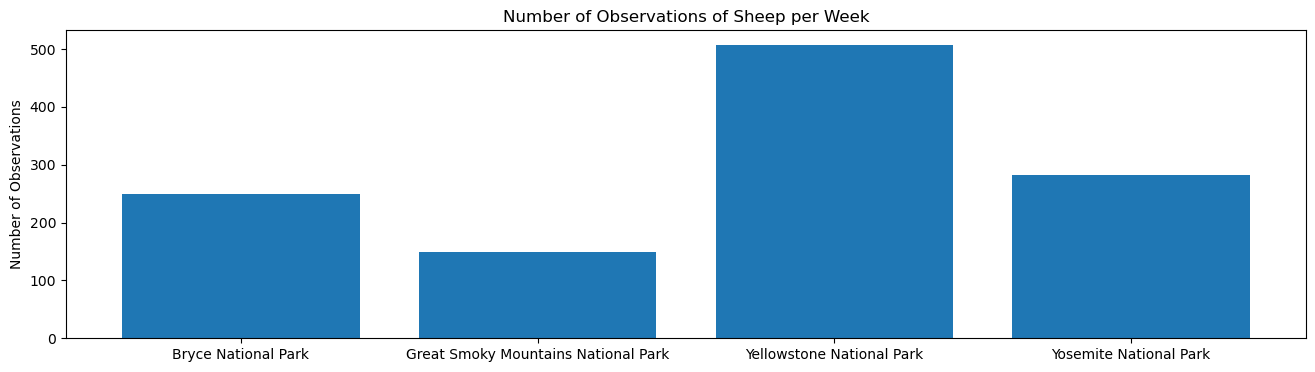

<Figure size 640x480 with 0 Axes>

In [228]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park)), obs_by_park.observations.values)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name.values)
plt.ylabel('Number of Observations')
plt.title('Number of Observations of Sheep per Week')
plt.show()
plt.savefig('NumberofObservationsofSheepperWeek.jpeg')

Now I need to calculate the minimum detectable effect, which is a percentage of the baseline. So to detect reductions of at least 5 percentage points the mininum detectable effect needs to be:

In [230]:
minimum_detectable_effect = 100.0 * 0.05 / 0.15
minimum_detectable_effect

33.333333333333336

Using <a href="https://s3.amazonaws.com/codecademy-content/courses/learn-hypothesis-testing/a_b_sample_size/index.html">Codecademy's sample size calculator</a>, with: 
 - a default Statistical Significance of 90%
 - Baseline of 15% 
 - The Minimun detectable effect of 33.33%

I found the sample size required to be 870 Sheep.

Below, I'll calculate the minimum weeks required for each park to reach the neccassary sample size.




In [297]:
import numpy as np

bryce_weeks = np.ceil(870/250)
yellowstone_weeks = np.ceil(870/507)

print("To test whether Yellowstone's program to reduce 'Foot in mouth disease' by 5% compared to Bryce's rates AND be \
confident in their findings, they would need to observe sheep for, " + str(bryce_weeks) + ", weeks in Bryce National Park and \
for, " + str(yellowstone_weeks) +  ", weeks in Yellowstone National Park.")

To test whether Yellowstone's program to reduce 'Foot in mouth disease' by 5% compared to Bryce's rates AND be confident in their findings, they would need to observe sheep for, 4.0, weeks in Bryce National Park and for, 2.0, weeks in Yellowstone National Park.


## Step 8: Animal Observations by Category in each National Park

First I'll create a table of all animals:

In [242]:
all_animals = all_data[all_data.biota == 'Fauna']
all_animals.head()

,category,scientific_name,common_names,conservation_status,animal,biota,is_endangered,park_name,observations,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,True,Fauna,False,Bryce National Park,130,False
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,True,Fauna,False,Yellowstone National Park,270,False
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,True,Fauna,False,Great Smoky Mountains National Park,98,False
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,True,Fauna,False,Yosemite National Park,117,False
4,Mammal,Bos bison,"American Bison, Bison",No Intervention,True,Fauna,False,Yosemite National Park,128,False


Then I create the graph, choosing a style to make the graph easy to read and pleasant for the eye.

C:\Users\olijw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


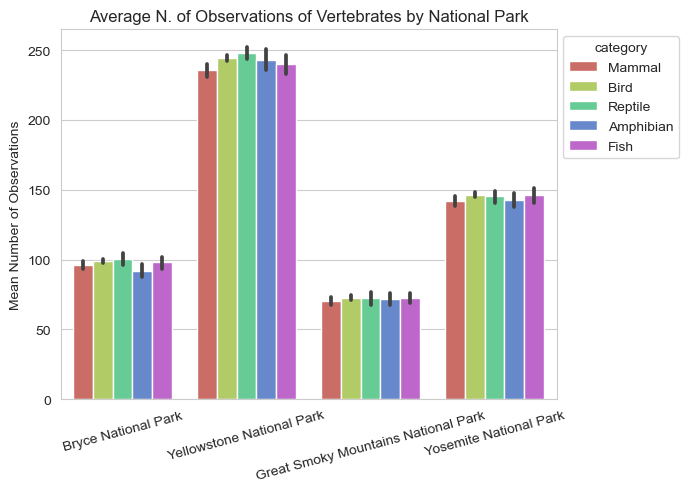

<Figure size 640x480 with 0 Axes>

In [296]:
sns.set_palette('hls', 5)
sns.set_style('whitegrid')
ax = sns.barplot(all_animals.park_name, all_animals.observations, hue=all_animals.category)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation = 15)
plt.ylabel('Mean Number of Observations')
plt.xlabel('')
plt.title('Average N. of Observations of Vertebrates by National Park')
plt.show()
plt.savefig('AverageNOfObservationsOfAnimalsByPark.jpg')

This graph shows us:
- Yellowstone has the most sightings of all categories of animals
- Great Smoky Mountains has the least sightings of all categories of animals
- Reptiles are the most common forms of animal in Bryce & Yellowstone National Parks
- Birds and Fish are the most common forms of animal in GSM & Yosemite National Parks
- Mammas accross all parks tend to be the least observed form of animal.

## Conservation status by category of vertebrate

First I'll group the `all_animals` table by `category` & `conservation_status`, counting the unique occurences of `scientific_name`.

In [315]:
count_animals_cs = all_animals.groupby(['category', 'conservation_status']).scientific_name.nunique().reset_index()
count_animals_cs.rename(columns={
    'scientific_name':'count'
}, inplace=True)
count_animals_cs

,category,conservation_status,count
0,Amphibian,Endangered,1
1,Amphibian,No Intervention,72
2,Amphibian,Species of Concern,4
3,Amphibian,Threatened,2
4,Bird,Endangered,4
5,Bird,In Recovery,3
6,Bird,No Intervention,413
7,Bird,Species of Concern,68
8,Fish,Endangered,3
9,Fish,No Intervention,115


Creating a bar chart that conveys this information:

C:\Users\olijw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


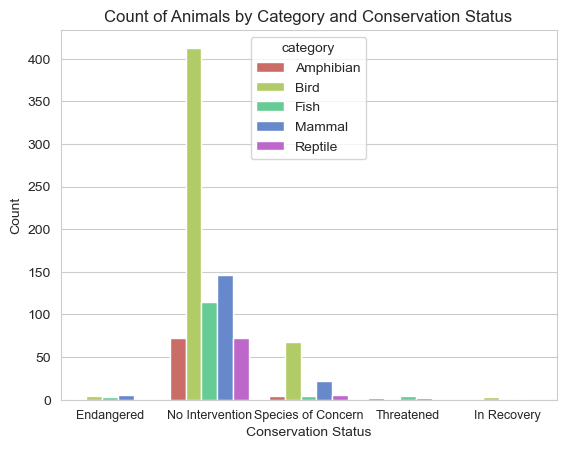

In [353]:
plt.figure()
ax = plt.subplot()
sns.barplot(count_animals_cs.conservation_status, count_animals_cs['count'], hue=count_animals_cs.category)
plt.rc('xtick', labelsize=7)
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.title('Count of Animals by Category and Conservation Status')
plt.show()

This bar chart shows that:
- Birds by far are the least intervened with, however they also make up the most 'Species of Concern'
- Mammals are second most likely to not be intervened with and be a 'Species of Concern'
- Mammals are most likely to be endangered.

The scale of 'No Intervention' makes the other `conservation_status` values hard to read, so I will remove instances where `conservation_status` = 'No Intervention' to create a bar chart to more easily draw some conclusions from.

In [328]:
new_animals_count_cs = count_animals_cs[count_animals_cs.conservation_status != 'No Intervention']
new_animals_count_cs

,category,conservation_status,count
0,Amphibian,Endangered,1
2,Amphibian,Species of Concern,4
3,Amphibian,Threatened,2
4,Bird,Endangered,4
5,Bird,In Recovery,3
7,Bird,Species of Concern,68
8,Fish,Endangered,3
10,Fish,Species of Concern,4
11,Fish,Threatened,4
12,Mammal,Endangered,6


C:\Users\olijw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


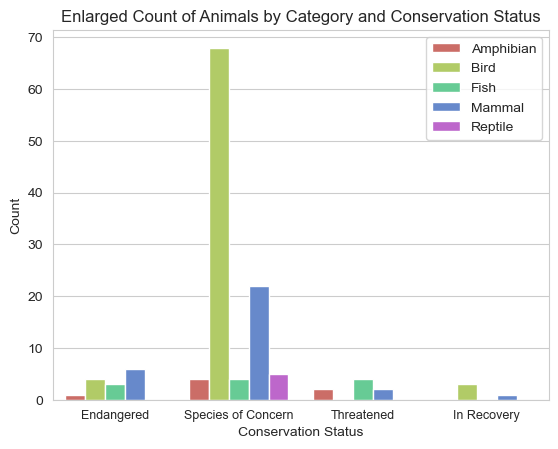

<Figure size 640x480 with 0 Axes>

In [352]:
plt.figure()
ax = plt.subplot()
sns.barplot(new_animals_count_cs.conservation_status, new_animals_count_cs['count'], hue=new_animals_count_cs.category)
plt.rc('xtick', labelsize=9)
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.title('Enlarged Count of Animals by Category and Conservation Status')
plt.legend(loc='upper right')
plt.show()
plt.savefig('AnimalsByCategoryAndConservationStatus.jpeg')

This bar chart shows that:
- Reptiles are not endangered or threatened (in these National Parks)
- Birds are not threatened
- Species of Fish are most likely to be threatened compared to other vertebrates
- Only Mammals and Birds are In Recovery